Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt

todo: initialise constants from the dataset (drop name column)
todo: redefine feed forward generally
todo: do todo 

Intialise network architecture

In [33]:
L = 3  # number of layers(excluding input layer)
n = 2  # number of features
m = 1  # number of output nodes

hidden_layers = 3  # number of layers(excluding input layer)
features = 2  # number of features
outputs = 1  # number of output nodes

In [34]:
def init_network(input_size=features, hidden_size=features+1, output_size=outputs, num_hidden_layers=hidden_layers):
    weights = []
    biases = []
    
    alpha = 1  # scaling factor for weights
    beta = 1   # scaling factor for biases

    # Input to first hidden layer
    weights.append(np.random.randn(hidden_size, input_size) * alpha)
    biases.append(np.random.randn(hidden_size, 1) * beta)
    
    # Hidden layers
    for i in range(num_hidden_layers - 1):
        weights.append(np.random.randn(hidden_size, hidden_size) * alpha)
        biases.append(np.random.randn(hidden_size, 1) * beta)
    
    # Last hidden to output layer
    weights.append(np.random.randn(output_size, hidden_size) * alpha)
    biases.append(np.random.randn(output_size, 1) * beta)
    
    return weights, biases

In [35]:
weights, biases = init_network()
print("Weights of the network:", weights)
print("Biases of the network:", biases)

Weights of the network: [array([[-0.33175513,  0.76561211],
       [ 0.46894634,  0.44464116],
       [-0.65441888,  0.12897632]]), array([[ 0.4037181 ,  0.05786122, -0.13040698],
       [-0.11121923,  0.35933662,  0.25469593],
       [ 0.70534988,  0.12185637,  0.43701857]]), array([[ 1.32875648,  0.30233388,  1.69193105],
       [ 1.3212224 ,  1.19152615, -0.9021939 ],
       [-0.27501323, -1.01152687,  0.09217554]]), array([[ 1.08662421,  1.02864017, -2.68626138]])]
Biases of the network: [array([[-0.72209286],
       [ 0.47724023],
       [-0.05643292]]), array([[-0.8110517 ],
       [ 0.23764747],
       [-0.53121654]]), array([[ 0.33744979],
       [-0.77794348],
       [-0.26309248]]), array([[0.5537263]])]


Training data

In [36]:
def prepare_data():
  X = np.array([
      [150, 70],
      [254, 73],
      [312, 68],
      [120, 60],
      [154, 61],
      [212, 65],
      [216, 67],
      [145, 67],
      [184, 64],
      [130, 69]
  ])
  y = np.array([0,1,1,0,0,1,1,0,1,0])
  m = y.shape[0]  # number of samples
  # Normalize the input features to prevent gradient issues
  X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
  # Transpose the input matrix to match the expected shape
  A0 = X.T
  # Reshape y to a matrix
  Y = y.reshape(outputs, m)

  return A0, Y

In [37]:
x_train, y_train = prepare_data()

Activation function sigmoid 
$$g(z)=\frac{1}{(1+e^{-z})}$$

In [38]:
# Sigmoid activation function
def sigmoid(arr):
    return 1 / (1+np.exp(-1*arr))

Feed forward

In [39]:
def feed_forward(input_layer=x_train, num_hidden_layers=hidden_layers, weights=weights, biases=biases):
  cache = [input_layer]
  
  for i in range(0,num_hidden_layers+1):
    prev_layer = cache[i]
    W = weights[i]
    b = biases[i]
    Z = W @ prev_layer + b
    A = sigmoid(Z)
    cache.append(A)

  return cache


In [40]:
cache = feed_forward(x_train)  # Get the output layer predictions
predictions = cache[-1]  # Last layer output
print("Predictions of the network:", cache[-1])
print("\nPredictions:", cache)

Predictions of the network: [[0.77800071 0.77982109 0.77747403 0.77152595 0.77237924 0.77539638
  0.77662654 0.77606353 0.77451626 0.77718905]]

Predictions: [array([[-0.65092849,  1.1447363 ,  2.14616475, -1.16890872, -0.58186446,
         0.41956398,  0.48862802, -0.73725852, -0.06388423, -0.99624864],
       [ 0.94736842,  1.73684211,  0.42105263, -1.68421053, -1.42105263,
        -0.36842105,  0.15789474,  0.15789474, -0.63157895,  0.68421053]]), array([[0.55457489, 0.55672532, 0.24754831, 0.16468788, 0.16561468,
        0.24170528, 0.31792772, 0.41177863, 0.2342542 , 0.53301629],
       [0.64410561, 0.85647693, 0.84169493, 0.30580939, 0.39472789,
        0.62484821, 0.68494408, 0.55025772, 0.54151817, 0.57792992],
       [0.62051509, 0.35857407, 0.19676806, 0.62041257, 0.53520864,
        0.40648364, 0.41196801, 0.60978478, 0.47599731, 0.66458138]]), array([[0.34732677, 0.35812871, 0.33446246, 0.30836465, 0.31192275,
        0.32512347, 0.33252424, 0.33347921, 0.32142746, 0.343194

Use loss as cost function: $L\left(\hat{y}_i y_i\right)=-\left(y_i \ln \hat{y}_i+\left(1-y_i\right) \ln \left(1-\hat{y}_i\right)\right)$


Hence cost given by: $C=\frac{1}{m} \sum_{i=1}^m L\left(\hat{y}_i, y_i\right)$

In [41]:
def cost(y_hat=predictions, y=y_train):
  """
  y_hat should be a n^L x m matrix
  y should be a n^L x m matrix
  """

  # Clip predictions to avoid log(0)
  y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)

  # 1. losses is a n^L x m
  losses = - ( (y * np.log(y_hat)) + (1 - y)*np.log(1 - y_hat) )

  return np.mean(losses)

In [42]:
print(cost(predictions, y_train))

0.8722401652531057


Backpropagation with formulas derived using calculus

In [43]:
def backprop_layer(dC_dA_current, A_current, A_prev, W_current, Y, layer_num):
    """
    Backpropagation for a single layer.

    Args:
        dC_dA_current:  Propagator from the next layer (dC/dA[l+1]). For the output layer, this is None.
        A_current:      Activations of the current layer (A[l])
        A_prev:         Activations of the previous layer (A[l-1])
        W_current:      Weights of the current layer (W[l])
        Y:              True labels (only needed for the output layer)

    Returns:
        dC_dW: Gradient of cost with respect to weights
        dC_db: Gradient of cost with respect to biases
        dC_dA_prev: Propagator to the previous layer (dC/dA[l-1])
    """

    # Calculate dC/dZ
    if dC_dA_current is None:  # Output layer
        dC_dZ = (1/m) * (A_current - Y)
    else:  # Hidden layer
        dA_dZ = A_current * (1 - A_current)
        dC_dZ = dC_dA_current * dA_dZ


    # calculate dC/dW
    dZ_dW = A_prev
    dC_dW = dC_dZ @ dZ_dW.T

    # step 3. calculate dC/db
    dC_db = np.sum(dC_dZ, axis=1, keepdims=True)

    # calculate propagator to the prev layer
    if layer_num != 0:  # Not the input layer
        dZ_dA_prev = W_current
        dC_dA_prev = W_current.T @ dC_dZ

    else:
        dC_dA_prev = None

    return dC_dW, dC_db, dC_dA_prev

Train

In [44]:
def train(epochs=500, alpha=0.1, hidden_layers=hidden_layers, features=features, outputs=outputs):
  global weights, biases, x_train, y_train
  
  costs = []
  num_layers = hidden_layers + 1

  for e in range(epochs):
    # Feed forward
    cache = feed_forward(x_train)
    predictions = cache[-1]
    
    # Cost
    costs.append(cost(predictions, y_train))

    # Backpropagation 
    dC_dA_prev = None
    updates = []
    for layer_num in range(num_layers, 0, -1):
        
        A_current = cache[layer_num]
        A_prev = cache[layer_num-1]
        W_current = weights[layer_num-1]

        dC_dW, dC_db, dC_dA_prev_new = backprop_layer(
            dC_dA_current=dC_dA_prev, 
            A_current=A_current, 
            A_prev=A_prev, 
            W_current=W_current, 
            Y=y_train,
            layer_num=layer_num
        )
        dC_dA_prev = dC_dA_prev_new
        updates.insert(0, (dC_dW, dC_db))


    # Update weights and biases
    for layer_num in range(num_layers):
        dC_dW, dC_db = updates[layer_num]

        # Update weights and biases
        weights[layer_num] -= alpha * dC_dW
        biases[layer_num] -= alpha * dC_db


    if e % 20 == 0:
      print(f"epoch {e}: cost = {costs[e]:4f}")
  
  return costs

In [45]:
for i in range(10,1,-1):
  print(i)

10
9
8
7
6
5
4
3
2


epoch 0: cost = 0.872240
epoch 20: cost = 0.678341
epoch 40: cost = 0.639923
epoch 60: cost = 0.471085
epoch 80: cost = 0.203247
epoch 100: cost = 0.094263
epoch 120: cost = 0.054931
epoch 140: cost = 0.037069
epoch 160: cost = 0.027450
epoch 180: cost = 0.021606
epoch 200: cost = 0.017737
epoch 220: cost = 0.015008
epoch 240: cost = 0.012989
epoch 260: cost = 0.011440
epoch 280: cost = 0.010216
epoch 300: cost = 0.009226
epoch 320: cost = 0.008409
epoch 340: cost = 0.007724
epoch 360: cost = 0.007141
epoch 380: cost = 0.006640
epoch 400: cost = 0.006204
epoch 420: cost = 0.005822
epoch 440: cost = 0.005484
epoch 460: cost = 0.005183
epoch 480: cost = 0.004914


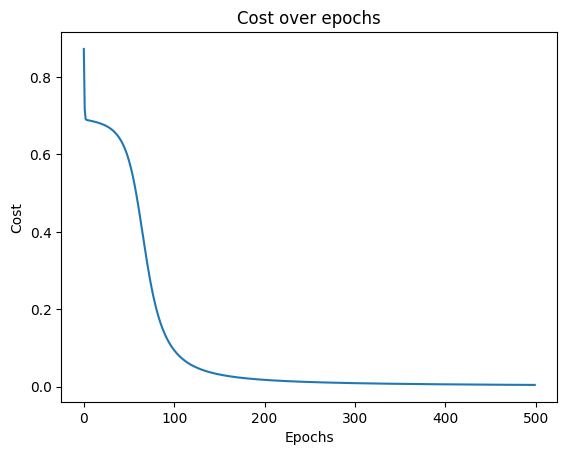

In [46]:
costs = train()
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over epochs')
plt.show()